## Aplicando o KNN em uma base de digitos escritos a mão

In [93]:
import pandas as pd
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

#carregando a base de digitos
digits = datasets.load_digits()

In [94]:
#imprimindo a descrição da base
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [95]:
#viasualizando as imagens disponiveis na base
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [96]:
#visualizando os valores das classes
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

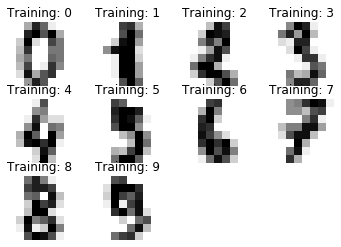

In [97]:
#visualizando as imagens das classes escritas a mão
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [98]:
#convertendo os dados da base em dataframe
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [99]:
#adicionando uma nova coluna ao dataframe
dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [100]:
#exibindo as cinco primeiras linhas do dataset
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Dividindo os dados em treino e teste

In [101]:
#dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_teste, Y_train, Y_teste = train_test_split(dataset.drop('classe', axis=1), dataset['classe'], test_size=0.3)

In [102]:
X_train.shape, X_teste.shape

((1257, 64), (540, 64))

In [103]:
Y_train.shape, Y_teste.shape

((1257,), (540,))

In [104]:
from sklearn.neighbors import KNeighborsClassifier
#especificando o paramentro k(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3)

## Realizando o treino dos dados

In [105]:
#treinando os dados
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [106]:
#Valores preditos
resultado = knn.predict(X_teste)
resultado

array([5, 2, 6, 5, 7, 2, 8, 7, 8, 8, 4, 1, 7, 1, 8, 9, 4, 7, 6, 7, 2, 4,
       2, 6, 6, 7, 8, 3, 6, 6, 7, 5, 5, 4, 1, 4, 6, 9, 4, 9, 4, 5, 0, 4,
       1, 3, 8, 3, 7, 3, 0, 7, 2, 7, 2, 1, 4, 3, 1, 2, 6, 8, 4, 8, 3, 0,
       1, 2, 5, 3, 1, 5, 5, 0, 9, 8, 0, 5, 6, 4, 9, 8, 1, 1, 5, 9, 3, 3,
       3, 1, 9, 7, 5, 4, 0, 2, 4, 1, 5, 7, 9, 0, 4, 3, 8, 6, 9, 9, 6, 7,
       1, 2, 0, 5, 4, 8, 9, 4, 3, 3, 4, 7, 9, 1, 2, 4, 8, 1, 3, 7, 5, 6,
       0, 8, 4, 6, 2, 8, 0, 7, 8, 6, 3, 8, 1, 9, 9, 8, 6, 7, 0, 2, 3, 3,
       7, 1, 4, 6, 4, 0, 1, 5, 3, 6, 3, 1, 8, 6, 2, 0, 4, 1, 9, 3, 1, 0,
       6, 9, 4, 5, 8, 2, 0, 2, 9, 8, 6, 1, 8, 1, 7, 4, 1, 1, 9, 9, 6, 6,
       5, 0, 6, 7, 2, 8, 0, 3, 7, 0, 4, 5, 1, 8, 7, 8, 4, 1, 9, 7, 3, 8,
       2, 9, 5, 3, 9, 4, 0, 5, 2, 8, 9, 9, 3, 5, 4, 4, 6, 3, 4, 0, 1, 2,
       9, 1, 5, 1, 5, 6, 5, 0, 8, 6, 6, 1, 6, 9, 6, 6, 1, 3, 5, 3, 1, 2,
       6, 4, 4, 2, 3, 2, 8, 8, 8, 8, 0, 8, 7, 6, 4, 5, 8, 9, 6, 5, 0, 7,
       3, 6, 0, 1, 0, 3, 0, 0, 0, 9, 9, 5, 9, 7, 3,

## Matriz de Confusão

In [107]:
pd.crosstab(Y_teste, resultado, rownames= ["valor real"], colnames=["valor predito"])

valor predito,0,1,2,3,4,5,6,7,8,9
valor real,,,,,,,,,,
0,6,5,6,6,4,2,6,4,6,3
1,5,8,3,3,6,3,10,3,7,8
2,6,3,3,2,11,2,6,10,5,7
3,7,12,6,5,1,7,2,5,7,7
4,6,2,3,4,7,5,9,3,6,4
5,4,5,9,10,5,5,2,3,7,5
6,3,5,10,8,4,5,5,6,3,4
7,3,4,7,7,5,4,7,6,3,8
8,8,5,6,6,11,7,7,2,4,4


## Mostrando a metrica de classificação

In [108]:
from sklearn import metrics
print(metrics.classification_report(Y_teste, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        59
           4       1.00      1.00      1.00        49
           5       0.98      1.00      0.99        55
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        54
           8       1.00      0.95      0.97        60
           9       1.00      0.98      0.99        51

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



## Utilizando cross validation

In [115]:
#testa e treina o algoritimo com diferentes porções de dados, parametro(cv-quatidade de interações)
from sklearn.model_selection import cross_val_score
scorres = cross_val_score(knn, dataset.drop('classe', axis=1), dataset['classe'], cv=5)
scorres

array([0.95604396, 0.95856354, 0.96657382, 0.98319328, 0.96619718])

## Otimizando o Parametro K

In [116]:
#importando o greadsearch
from sklearn.model_selection import GridSearchCV

In [117]:
#definindo um intervalo de valores 
k_list = list(range(1,31))

In [118]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [120]:
#Instânciando o objeto GridSearch
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

In [121]:
#treinando o objet
grid.fit(dataset.drop('classe',axis=1),dataset['classe'])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [135]:
#visualizando os scores
grid.cv_results_.get('mean_test_score') 

array([0.96494157, 0.96661102, 0.96605454, 0.9638286 , 0.96271564,
       0.95937674, 0.95993322, 0.95770729, 0.95603784, 0.95492487,
       0.95548136, 0.95603784, 0.95548136, 0.95603784, 0.95436839,
       0.95436839, 0.95325543, 0.94880356, 0.95158598, 0.95047301,
       0.94880356, 0.94991653, 0.94824708, 0.94936004, 0.94602115,
       0.94546466, 0.94490818, 0.94268225, 0.94045632, 0.94045632])

In [136]:
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Melhor valor de k = {'n_neighbors': 2} com o valor 0.9666110183639399 de acurácia


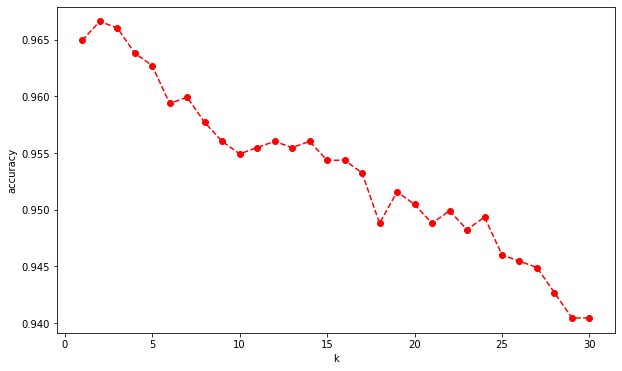

In [153]:
scores = grid.cv_results_.get('mean_test_score')  

plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()